# Ocular Disease Prediction using five class of eye disease 
1. cataract 
2.golucoma
3.age macular disease
4.normal
5.others

# importing some importance library 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tqdm import tqdm
import shutil
import random
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.layers import  Dropout, Dense, Flatten, BatchNormalization,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import GridSearchCV

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# uploading the dataset

In [2]:
df=pd.read_csv("/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv")
df.head(30)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
5,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",6_right.jpg
6,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",7_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
8,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg
9,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg


# data_preprocessing


In [3]:
dast=df[df['labels']== "['N']"]
dast

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
9,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg
24,29,59,Male,29_left.jpg,29_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",29_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,4637,45,Male,4637_left.jpg,4637_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",4637_left.jpg
6358,4639,60,Female,4639_left.jpg,4639_right.jpg,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",4639_left.jpg
6360,4641,56,Male,4641_left.jpg,4641_right.jpg,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",4641_left.jpg
6378,4672,65,Male,4672_left.jpg,4672_right.jpg,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",4672_left.jpg


In [4]:
df.tail(20).isna()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
6372,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6373,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6375,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6378,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6379,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6380,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6381,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
train=df.drop(columns=['M', 'D', 'H', ],axis=1)


train=train[((train['labels'] == "['N']") | (train['labels'] == "['G']") | (train['labels']== "['C']") | (train['labels'] == "['A']")| (train['labels']=="['O']"))]

# Classes
classes=['N','G', 'C', 'A', 'O']


train = train.reset_index(drop=True)

In [6]:
train.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,G,C,A,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
3,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg
4,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg


making the seprate seprate folder of each disease image

In [7]:
glaucoma=[]
for i in range(len(train)):
    if(train['labels'][i]=="['G']"):
        glaucoma.append(train['filename'][i])
        
cataract=[]
for i in range(len(train)):
    if(train['labels'][i]=="['C']"):
        cataract.append(train['filename'][i])

amd=[]
for i in range(len(train)):
    if(train['labels'][i]=="['A']"):
        amd.append(train['filename'][i])
        
normal=[]
for i in range(len(train)):
    if(train['labels'][i]=="['N']"):
        normal.append(train['filename'][i])
        
other=[]
for i in range(len(train)):
    if(train['labels'][i]=="['O']"):
        other.append(train['filename'][i])       

In [8]:
if os.path.isdir('./Data/cataract/') is True:
#     os.mkdir('./Data')
      print("exists")

In [9]:
# Copy images to new path
if os.path.isdir('./Data') is False:
    os.mkdir('./Data')

# (Glaucoma, Cataract, Age related Macular Degeneration, Hypertension)

glaucoma_dir='./Data/glaucoma/'
os.mkdir('./Data/glaucoma/')
for filename in tqdm(glaucoma):
  shutil.copy('../input/ocular-disease-recognition-odir5k/preprocessed_images/'+filename,glaucoma_dir)

cataract_dir='./Data/cataract/'
os.mkdir('./Data/cataract/')
for filename in tqdm(cataract):
  shutil.copy('../input/ocular-disease-recognition-odir5k/preprocessed_images/'+filename,cataract_dir)

macular_dir='./Data/age_related_macular_degeneration/'
os.mkdir('./Data/age_related_macular_degeneration/')
for filename in tqdm(amd):
  shutil.copy('../input/ocular-disease-recognition-odir5k/preprocessed_images/'+filename,macular_dir)

normal_dir='./Data/normal/'
os.mkdir('./Data/normal/')
for filename in tqdm(normal):
  shutil.copy('../input/ocular-disease-recognition-odir5k/preprocessed_images/'+filename,normal_dir)

other_dir='./Data/other_diseases/'
os.mkdir('./Data/other_diseases/')
for filename in tqdm(other):
  shutil.copy('../input/ocular-disease-recognition-odir5k/preprocessed_images/'+filename,other_dir)


100%|██████████| 708/708 [00:06<00:00, 104.84it/s]


In [11]:
base_dir = './Dataset/'
if os.path.isdir(base_dir) is False:
    os.mkdir(base_dir)

#Train, Testing and Validation set
train_dir = os.path.join(base_dir, 'Training')
os.mkdir(train_dir)

testing_dir = os.path.join(base_dir, 'Testing')
os.mkdir(testing_dir)

validation_dir = os.path.join(base_dir, 'Validation')
os.mkdir(validation_dir)

# Under train folder create four folders 
# (Glaucoma, Cataract, Age related Macular Degeneration, Normal, Others)

train_glaucoma_dir = os.path.join(train_dir, 'glaucoma')
os.mkdir(train_glaucoma_dir)

train_cataract_dir = os.path.join(train_dir, 'cataract')
os.mkdir(train_cataract_dir)

train_age_macular_dir = os.path.join(train_dir, 'age_related_macular_degeneration')
os.mkdir(train_age_macular_dir)

train_normal_dir = os.path.join(train_dir, 'normal')
os.mkdir(train_normal_dir)


train_other_diseases_dir = os.path.join(train_dir, 'other_diseases')
os.mkdir(train_other_diseases_dir)


# Under testing folder create four folders 

testing_glaucoma_dir = os.path.join(testing_dir, 'glaucoma')
os.mkdir(testing_glaucoma_dir)

testing_cataract_dir = os.path.join(testing_dir, 'cataract')
os.mkdir(testing_cataract_dir)

testing_age_macular_dir = os.path.join(testing_dir, 'age_related_macular_degeneration')
os.mkdir(testing_age_macular_dir)

testing_normal_dir = os.path.join(testing_dir, 'normal')
os.mkdir(testing_normal_dir)

testing_other_diseases_dir = os.path.join(testing_dir, 'other_diseases')
os.mkdir(testing_other_diseases_dir)

# Under validation folder create four folders 
# (Glaucoma, Cataract, Age related Macular Degeneration, Pathological Myopia)

validation_glaucoma_dir = os.path.join(validation_dir, 'glaucoma')
os.mkdir(validation_glaucoma_dir)

validation_cataract_dir = os.path.join(validation_dir, 'cataract')
os.mkdir(validation_cataract_dir)

validation_age_macular_dir = os.path.join(validation_dir, 'age_related_macular_degeneration')
os.mkdir(validation_age_macular_dir)

validation_normal_dir = os.path.join(validation_dir, 'normal')
os.mkdir(validation_normal_dir)

validation_other_diseases_dir = os.path.join(validation_dir, 'other_diseases')
os.mkdir(validation_other_diseases_dir)

FileExistsError: [Errno 17] File exists: './Dataset/Training'

In [12]:
glaucoma_source_dir = '/kaggle/input/ocr-filtred/Data/glaucoma/'
training_glaucoma_dir = './Dataset/Training/glaucoma/'
testing_glaucoma_dir = './Dataset/Testing/glaucoma/'
valid_glaucoma_dir = './Dataset/Validation/glaucoma/'

cataract_source_dir = '/kaggle/input/ocr-filtred/Data/cataract/'
training_cataract_dir = './Dataset/Training/cataract/'
testing_cataract_dir = './Dataset/Testing/cataract/'
valid_cataract_dir = './Dataset/Validation/cataract/'

age_related_macular_degeneration_source_dir = '/kaggle/input/ocr-filtred/Data/age_related_macular_degeneration/'
training_age_related_macular_degeneration_dir = './Dataset/Training/age_related_macular_degeneration/'
testing_age_related_macular_degeneration_dir = './Dataset/Testing/age_related_macular_degeneration/'
valid_age_related_macular_degeneration_dir = './Dataset/Validation/age_related_macular_degeneration/'

normal_source_dir = '/kaggle/input/ocr-filtred/Data/normal/'
training_normal_dir = './Dataset/Training/normal/'
testing_normal_dir = './Dataset/Testing/normal/'
valid_normal_dir = './Dataset/Validation/normal/'


other_diseases_source_dir = '/kaggle/input/ocr-filtred/Data/other_diseases/'
training_other_diseases_dir = './Dataset/Training/other_diseases/'
testing_other_diseases_dir = './Dataset/Testing/other_diseases/'
valid_other_diseases_dir = './Dataset/Validation/other_diseases/'

In [13]:
def split_data(SOURCE, TRAINING, TESTING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
    
    SIZE = (1 - SPLIT_SIZE) / 2
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) * SIZE)
    valid_length = int(len(files) * SIZE)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[training_length:training_length+testing_length]
    valid_set = shuffled_set[training_length+testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        shutil.copy(this_file, destination)
        
    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        shutil.copy(this_file, destination)
    
    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        shutil.copy(this_file, destination)

In [24]:
split_size = 0.80

split_data(glaucoma_source_dir, training_glaucoma_dir, testing_glaucoma_dir, valid_glaucoma_dir, split_size)
split_data(cataract_source_dir, training_cataract_dir, testing_cataract_dir, valid_cataract_dir, split_size)
split_data(age_related_macular_degeneration_source_dir, training_age_related_macular_degeneration_dir, testing_age_related_macular_degeneration_dir, valid_age_related_macular_degeneration_dir, split_size)
split_data(other_diseases_source_dir, training_other_diseases_dir, testing_other_diseases_dir, valid_other_diseases_dir, split_size)
split_data(normal_source_dir, training_normal_dir, testing_normal_dir, valid_normal_dir, split_size)


# Data augmentation

In [25]:
def img_aug(img_height,img_width):
    train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                        rotation_range = 30,
                                        width_shift_range = 0.1,
                                        height_shift_range = 0.1,
                                        zoom_range = 0.1,
                                        horizontal_flip = True,
                                       vertical_flip=True,
                                       shear_range=0.2,
                                brightness_range=[0.3,1],
                                        fill_mode='nearest'
                                       )
    train_generator = train_datagen.flow_from_directory('./Dataset/Training/', 
                                                        target_size=(img_height,img_width), 
                                                        class_mode='categorical')
    validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
    validation_generator = validation_datagen.flow_from_directory('./Dataset/Validation/', 
                                                              target_size=(img_height,img_width),
                                                              class_mode='categorical')
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory('./Dataset/Testing/', 
                                                              target_size=(img_height,img_width),
                                                              class_mode='categorical')
    
    return train_generator,validation_generator,test_generator

In [26]:
train_generator,validation_generator,test_generator = img_aug(224,224)

Found 4762 images belonging to 5 classes.
Found 1314 images belonging to 5 classes.
Found 1295 images belonging to 5 classes.


In [27]:
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import confusion_matrix
import matplotlib.pyplot as plt

In [28]:
IMAGE_SIZE=224
BATCH_SIZE=32
CHANNLES= 3
epochs=50

In [29]:
data=tf.keras.preprocessing.image_dataset_from_directory("/kaggle/working/Data",
                                                    shuffle=True,
                                                    image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE
                                                           )

Found 4424 files belonging to 5 classes.


In [30]:
class_names = data.class_names
class_names

['age_related_macular_degeneration',
 'cataract',
 'glaucoma',
 'normal',
 'other_diseases']

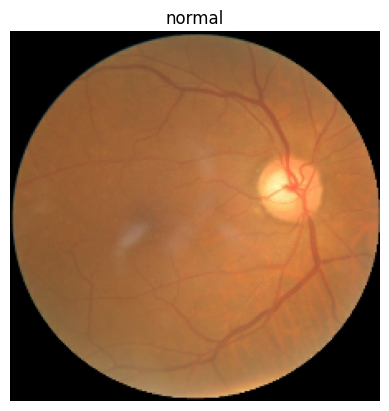

In [31]:
for image_batch, label_batch in data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))# the images will change every time because of suffle
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
#     print(image_batch[0].shape)
#     print(image_batch[0].numpy()) # here  image convert to tensor 3D and the is represent 0 to 255
    
#     print(label_batch.numpy())

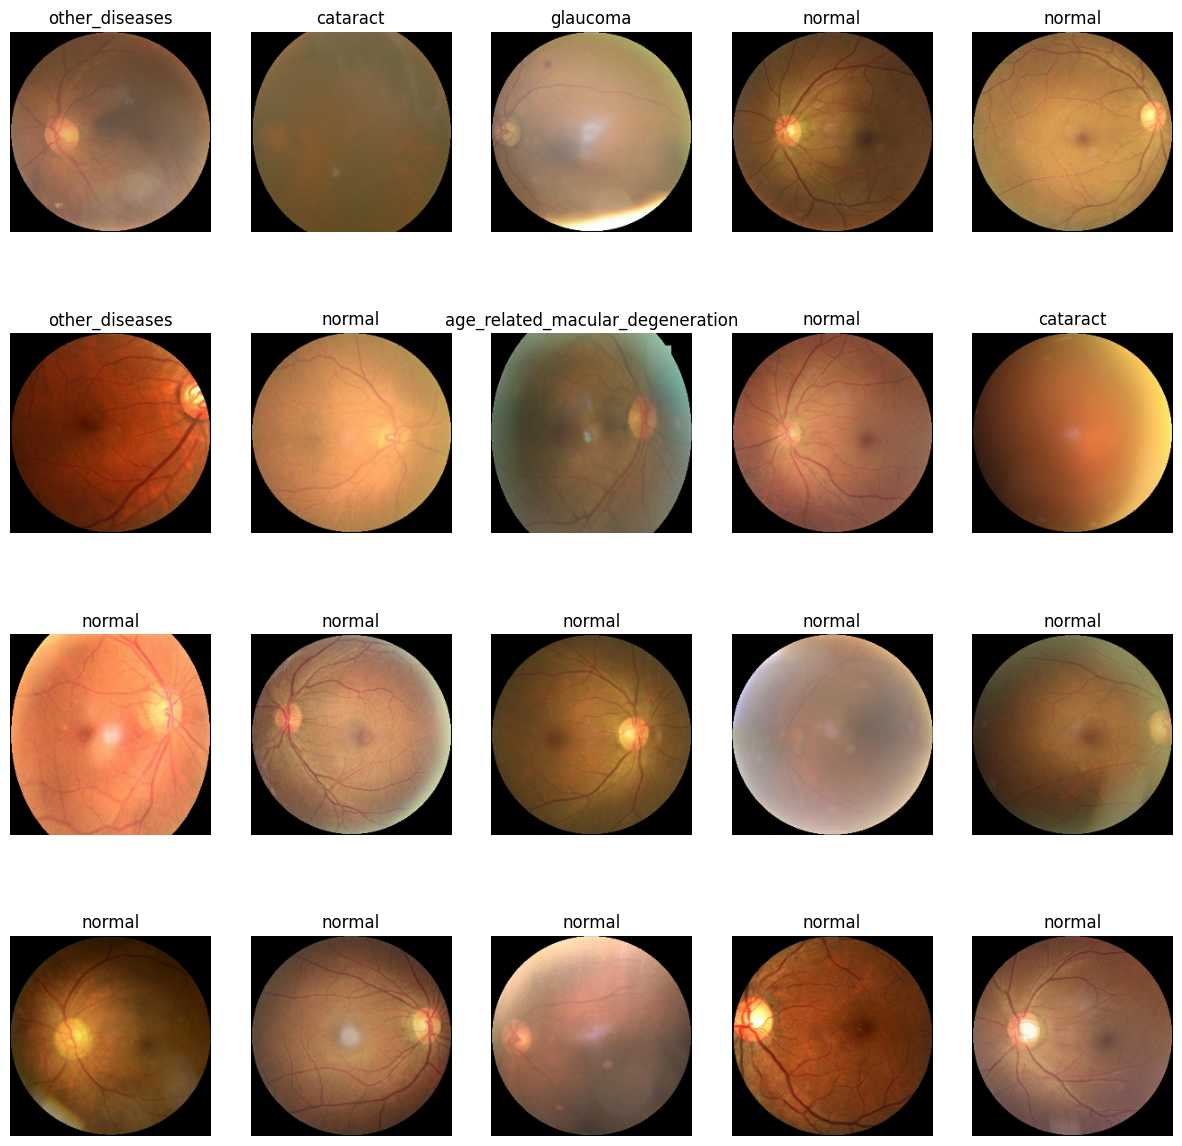

In [32]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in data.take(1):
    for i in range(20):
        ax=plt.subplot(4,5,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))# the images will change every time because of suffle
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [33]:
# import tensorflow as tf
# num_classes=5
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D

# # Load the InceptionV3 base model (excluding the top dense layers)
# base_model = tf.keras.applications.InceptionV3(weights='/kaggle/input/tf-keras-pretrained-model-weights/No Top/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(299, 299, 3))

# # Freeze the layers of the base model (optional, you can choose to fine-tune later)
# for layer in base_model.layers:
#     layer.trainable = False

# # Add custom layers on top of the base model
# x = GlobalAveragePooling2D()(base_model.output)
# x = Dense(1024, activation='relu')(x)
# output = Dense(num_classes, activation='softmax')(x)  # num_classes is the number of output classes

# # Create the custom InceptionV3 model
# custom_inception = Model(inputs=base_model.input, outputs=output)

# # Compile the model (set optimizer, loss function, etc.)
# custom_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Optionally, you can print a summary of the model architecture
# custom_inception.summary()


# testing the inceptionv3 model 

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout

In [35]:
# Load the InceptionV3 base model (excluding the top dense layers)

num_classes=5
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

87910968/87910968 [==============================] - 0s 0us/step


In [56]:
# Unfreeze some layers for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Add custom layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
output = Dense(num_classes, activation='softmax')(x)


In [57]:
# Create the custom InceptionV3 model
model = Model(inputs=base_model.input, outputs=output)

# Implement learning rate scheduling
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=0.8
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [58]:
# model.summary()

In [59]:
# Compile the model with the new optimizer and loss function
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)


In [ ]:

history = model.fit(
    train_generator,
    epochs=150,  
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/150
149/149 [==============================] - 101s 454ms/step - loss: 0.2889 - accuracy: 0.8900 - val_loss: 0.4514 - val_accuracy: 0.8607
Epoch 2/150
149/149 [==============================] - 67s 446ms/step - loss: 0.2092 - accuracy: 0.9143 - val_loss: 0.2736 - val_accuracy: 0.9110
Epoch 3/150
149/149 [==============================] - 66s 444ms/step - loss: 0.2002 - accuracy: 0.9175 - val_loss: 0.2878 - val_accuracy: 0.8935
Epoch 4/150
149/149 [==============================] - 66s 444ms/step - loss: 0.2061 - accuracy: 0.9120 - val_loss: 0.2471 - val_accuracy: 0.9155
Epoch 5/150
149/149 [==============================] - 65s 438ms/step - loss: 0.2148 - accuracy: 0.9133 - val_loss: 0.2600 - val_accuracy: 0.9193
Epoch 6/150
149/149 [==============================] - 66s 440ms/step - loss: 0.2065 - accuracy: 0.9131 - val_loss: 0.2834 - val_accuracy: 0.9011
Epoch 7/150
113/149 [=====================>........] - ETA: 15s - loss: 0.1825 - accuracy: 0.9235

In [ ]:
model.evaluate(test_generator)

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout

# Load the InceptionV3 base model (excluding the top dense layers)
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Unfreeze some layers for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Add custom layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
output = Dense(num_classes, activation='softmax')(x)

# Create the custom InceptionV3 model
custom_inception = Model(inputs=base_model.input, outputs=output)

# Implement learning rate scheduling
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model with the new optimizer and loss function
custom_inception.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model
history = custom_inception.fit(
    train_generator,
    epochs=100,  # Increase the number of epochs
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


Epoch 1/100
149/149 [==============================] - 119s 478ms/step - loss: 1.2186 - accuracy: 0.4794 - val_loss: 1.1018 - val_accuracy: 0.4741
Epoch 2/100
149/149 [==============================] - 67s 447ms/step - loss: 1.0607 - accuracy: 0.5470 - val_loss: 0.9797 - val_accuracy: 0.5944
Epoch 3/100
149/149 [==============================] - 66s 445ms/step - loss: 0.9920 - accuracy: 0.5764 - val_loss: 0.8887 - val_accuracy: 0.6370
Epoch 4/100
149/149 [==============================] - 67s 446ms/step - loss: 0.9569 - accuracy: 0.5979 - val_loss: 0.8809 - val_accuracy: 0.6309
Epoch 5/100
149/149 [==============================] - 67s 450ms/step - loss: 0.9012 - accuracy: 0.6283 - val_loss: 0.8387 - val_accuracy: 0.6613
Epoch 6/100
149/149 [==============================] - 67s 449ms/step - loss: 0.8729 - accuracy: 0.6405 - val_loss: 1.0105 - val_accuracy: 0.6126
Epoch 7/100
149/149 [==============================] - 67s 445ms/step - loss: 0.8316 - accuracy: 0.6516 - val_loss: 0.8066 

In [42]:
model=custom_inception.evaluate(test_generator)

41/41 [==============================] - 4s 86ms/step - loss: 0.1579 - accuracy: 0.9544


In [43]:
class_dict = list(test_generator.class_indices.keys())
print(class_dict)

['age_related_macular_degeneration', 'cataract', 'glaucoma', 'normal', 'other_diseases']


Following is our prediction:
1/1 [==============================] - 2s 2s/step


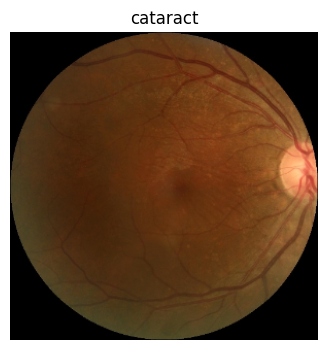

In [44]:
import cv2

def predict(image_path):
    new_img = cv2.imread(image_path)
    new_img = cv2.resize(new_img, (299, 299))
    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    img = np.asarray(new_img)
    img = np.expand_dims(img, axis=0)
   

    print("Following is our prediction:")
    prediction = custom_inception.predict(img)
# Decoding the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
    d = prediction.flatten()
    j = d.max()
    for index,item in enumerate(d):
        if item == j:
            class_name = class_dict[index]
      
        
        
        
# Ploting image with predicted class name        
    plt.figure(figsize = (4,4))
    plt.imshow(new_img)
    plt.axis('off')
    plt.title(class_name)
    plt.show()        
    

predict("/kaggle/working/Data/age_related_macular_degeneration/410_right.jpg")    

1/1 [==============================] - 0s 26ms/step


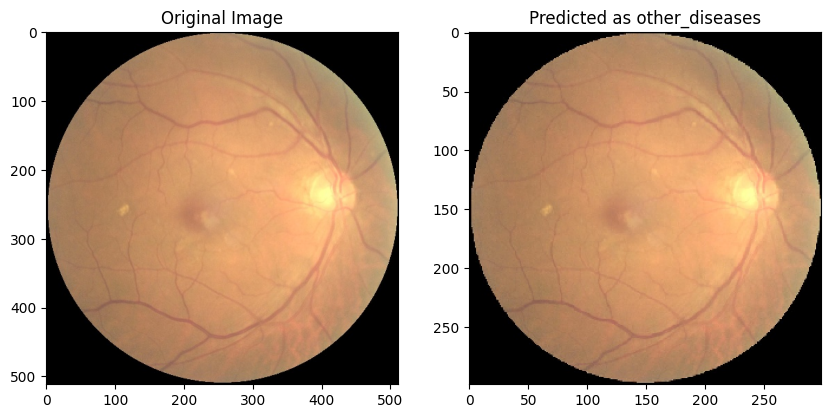

In [54]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the new image
new_image_path = '/kaggle/working/Data/other_diseases/1010_right.jpg'  # Replace with the actual path to your new image
new_image = image.load_img(new_image_path, target_size=(299, 299))
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)
new_image = new_image / 255.0  # Normalize the pixel values

# Make a prediction using the custom InceptionV3 model
prediction = custom_inception.predict(new_image)

# Get the predicted class label
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image.load_img(new_image_path))
plt.title('Original Image')

# Display the predicted image
plt.subplot(1, 2, 2)
plt.imshow(new_image[0])
plt.title(f'Predicted as {predicted_class}')

plt.show()


In [46]:
filepath='Ocular_disease_final_model.h5'
custom_inception.save(filepath)

In [48]:
m=keras.models.load_model("/kaggle/working/Ocular_disease_final_model.h5")
acc=m.evaluate(validation_generator,verbose=1)[1]

print(f"Test accuracy of your model is = {acc*100} %")

42/42 [==============================] - 5s 83ms/step - loss: 0.1551 - accuracy: 0.9460
Test accuracy of your model is = 94.59665417671204 %


In [49]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = m.predict(validation_generator)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true class labels
y_true_labels = validation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Compute the classification report
report = classification_report(y_true_labels, y_pred_labels)

# Print the confusion matrix and classification report
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(report)

42/42 [==============================] - 5s 80ms/step
Confusion Matrix:
[[  8   8   7  37  33]
 [  4   8   4  56  39]
 [  4   9   7  49  42]
 [ 45  42  46 255 180]
 [ 22  37  37 182 153]]
Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.09      0.09        93
           1       0.08      0.07      0.07       111
           2       0.07      0.06      0.07       111
           3       0.44      0.45      0.44       568
           4       0.34      0.35      0.35       431

    accuracy                           0.33      1314
   macro avg       0.21      0.21      0.20      1314
weighted avg       0.32      0.33      0.32      1314



In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [53]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the new image
new_image_path = '/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/0_left.jpg'  # Replace with the actual path to your new image
new_image = image.load_img(new_image_path, target_size=(299, 299))
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)
new_image = new_image / 255.0  # Normalize the pixel values

# Make a prediction using the custom InceptionV3 model
prediction = custom_inception.predict(new_image)

# Get the predicted class label
predicted_class_index = np.argmax(prediction)

# Print the predicted class label
print("Predicted Class:", class_names[predicted_class_index])


1/1 [==============================] - 0s 26ms/step
Predicted Class: cataract
